In [52]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [53]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [54]:
df.head

<bound method NDFrame.head of         pregnant  glucose             bp           skin  insulin   bmi  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35        0  33.6   
2              1       85             66             29        0  26.6   
3              8      183             64              0        0  23.3   
4              1       89             66             23       94  28.1   
..           ...      ...            ...            ...      ...   ...   
764           10      101             76             48      180  32.9   
765            2      122             70             27        0  36.8   
766            5      121             72             23      112  26.2   
767            1      126             60              0        0  30.1   
768            1       93             70             31        0  30.4   

                     pedigree  age    label  
0    DiabetesPedigreeFunction  Age 

In [55]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
Y = df.label # Target variable

In [56]:
X

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
...,...,...,...,...,...,...,...
764,10,180,32.9,63,101,76,0.171
765,2,0,36.8,27,122,70,0.34
766,5,112,26.2,30,121,72,0.245
767,1,0,30.1,47,126,60,0.349


In [57]:
Y

0      Outcome
1            1
2            0
3            1
4            0
        ...   
764          0
765          0
766          0
767          1
768          0
Name: label, Length: 769, dtype: object

In [58]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test


In [59]:
# Convert all columns to numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test  = X_test.apply(pd.to_numeric, errors='coerce')

# Optionally, check for missing values created during conversion
print(X_train.isna().sum())
print(X_test.isna().sum())

# Fill or drop missing values if any
X_train = X_train.fillna(0)  # or another strategy
X_test = X_test.fillna(0)


pregnant    0
insulin     0
bmi         0
age         0
glucose     0
bp          0
pedigree    0
dtype: int64
pregnant    1
insulin     1
bmi         1
age         1
glucose     1
bp          1
pedigree    1
dtype: int64


In [64]:

# Create Decision Tree classifer object
dtm = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtm = dtm.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = dtm.predict(X_test)

#------------------Optimizing--------------------#
# Create Decision Tree classifer object
#dtm = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
#dtm = dtm.fit(X_train,Y_train)

#Predict the response for test dataset
#y_pred = dtm.predict(X_test)



Evaluating The Model


In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.7142857142857143


Visualizing Decision Trees

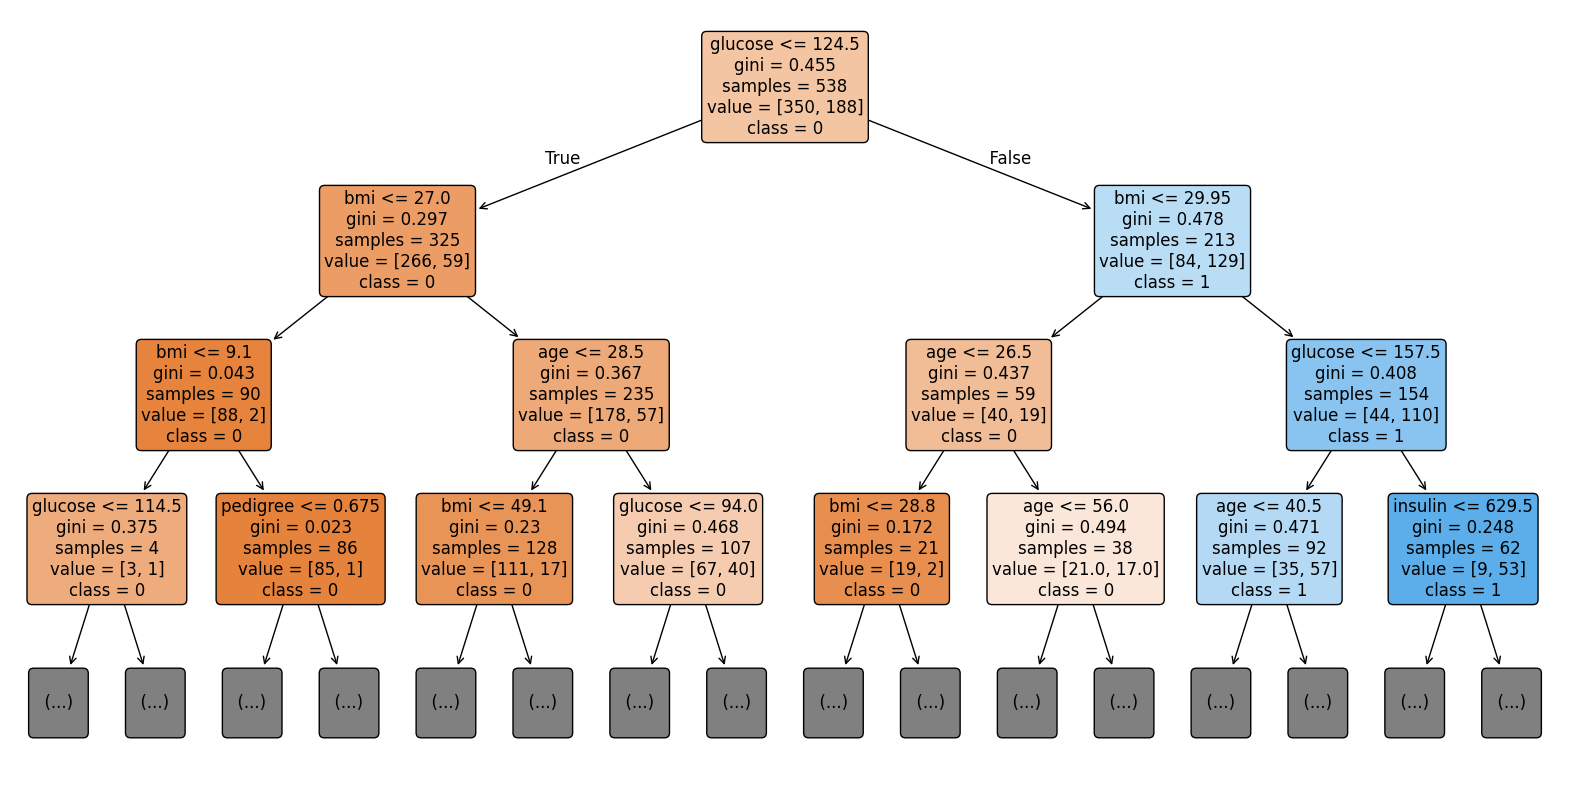

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Limit max depth for visualization only
plt.figure(figsize=(20,10))
plot_tree(
    dtm, 
    feature_names=feature_cols, 
    class_names=['0', '1'], 
    filled=True, 
    rounded=True,
    max_depth=3,   
    fontsize=12
)
plt.show()